# Data Preprocessing

## Data Loading and Setup

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_excel('StoresData.xlsx')

## Initial Data Exploration and Cleaning

In [5]:
df

,Store No.,Sales $m,Wages $m,No. Staff,Location,Loc'n (Num),State,State (Num),Age (Yrs),GrossProfit,...,Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel,HomeDel (Num),Basket:2013,Basket:2014
0,1,12.5,2.3,60,Mall,2,NSW,1,10,0.712,...,0,33,12,2,38,46,Del:No,0,171,178
1,2,14.5,2.7,69,Mall,2,Vic,2,8,0.091,...,0,33,16,1,38,73,Del:No,0,168,178
2,3,19.0,3.1,79,Country,3,Vic,2,7,1.075,...,0,30,9,2,39,64,Del:No,0,180,188
3,4,18.2,2.6,66,Mall,2,Qld,3,7,1.372,...,0,29,9,2,38,66,Del:Yes,1,173,180
4,5,7.6,2.0,51,Strip,1,Qld,3,15,2.148,...,0,36,4,3,40,29,Del:No,0,166,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,14.1,3.3,88,Strip,1,SA,4,5,0.504,...,1,42,9,3,35,63,Del:No,0,163,172
146,147,8.1,1.7,58,Country,3,NSW,1,19,0.447,...,0,43,12,3,42,35,Del:No,0,178,186
147,148,13.6,2.9,66,Strip,1,WA,5,17,2.620,...,0,39,8,3,45,48,Del:No,0,166,172
148,149,10.0,2.0,55,Mall,2,WA,5,8,1.168,...,0,52,13,3,40,34,Del:No,0,174,182


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store No.      150 non-null    int64  
 1   Sales $m       150 non-null    float64
 2   Wages $m       150 non-null    float64
 3   No. Staff      150 non-null    int64  
 4   Location       150 non-null    object 
 5   Loc'n (Num)    150 non-null    int64  
 6   State          150 non-null    object 
 7   State (Num)    150 non-null    int64  
 8   Age (Yrs)      150 non-null    int64  
 9   GrossProfit    150 non-null    float64
 10  Adv.$'000      150 non-null    int64  
 11  Competitors    150 non-null    int64  
 12  HrsTrading     150 non-null    int64  
 13  Sundays        150 non-null    object 
 14  Sundays (Num)  150 non-null    int64  
 15  Mng-Sex        150 non-null    object 
 16  Mng-Sex (Num)  150 non-null    int64  
 17  Mng-Age        150 non-null    int64  
 18  Mng-Exp   

it seems that data does not have missing values

In [7]:
# let's make sure
df.isnull().sum()

Store No.        0
Sales $m         0
Wages $m         0
No. Staff        0
Location         0
Loc'n (Num)      0
State            0
State (Num)      0
Age (Yrs)        0
GrossProfit      0
Adv.$'000        0
Competitors      0
HrsTrading       0
Sundays          0
Sundays (Num)    0
Mng-Sex          0
Mng-Sex (Num)    0
Mng-Age          0
Mng-Exp          0
Mng-Train        0
Union%           0
Car Spaces       0
HomeDel          0
HomeDel (Num)    0
Basket:2013      0
Basket:2014      0
dtype: int64

In [8]:
# there is no need for the store no. column i think
df = df.drop('Store No.', axis=1)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,Sales $m,Wages $m,No. Staff,Loc'n (Num),State (Num),Age (Yrs),GrossProfit,Adv.$'000,Competitors,HrsTrading,Sundays (Num),Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel (Num),Basket:2013,Basket:2014
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,11.659333,2.376667,61.493333,1.913333,3.033333,8.846667,1.009953,147.273333,2.506667,106.353333,0.620000,0.166667,38.420000,9.253333,2.813333,37.786667,44.186667,0.300000,171.806667,178.846667
std,3.570989,0.567866,14.605206,0.767954,1.894594,5.442483,0.645794,67.994265,1.744586,23.676550,0.487013,0.373927,7.337748,3.985185,1.183707,4.899783,22.162725,0.459793,8.005616,8.637158
min,5.900000,1.500000,35.000000,1.000000,1.000000,1.000000,0.018000,20.000000,0.000000,72.000000,0.000000,0.000000,27.000000,1.000000,1.000000,24.000000,8.000000,0.000000,156.000000,162.000000
25%,8.825000,1.900000,51.000000,1.000000,1.000000,4.250000,0.511000,101.000000,1.000000,87.250000,0.000000,0.000000,33.000000,7.000000,2.000000,35.000000,26.000000,0.000000,164.000000,171.000000
50%,10.950000,2.200000,58.000000,2.000000,3.000000,7.500000,0.975000,130.500000,2.000000,101.000000,1.000000,0.000000,37.000000,9.000000,3.000000,38.000000,39.500000,0.000000,172.000000,179.000000
75%,14.000000,2.700000,69.750000,2.750000,4.000000,12.000000,1.415000,196.750000,4.000000,120.750000,1.000000,0.000000,43.000000,12.000000,3.000000,41.000000,58.000000,1.000000,178.000000,185.000000
max,23.500000,3.900000,117.000000,3.000000,8.000000,24.000000,2.872000,369.000000,7.000000,168.000000,1.000000,1.000000,61.000000,21.000000,6.000000,50.000000,114.000000,1.000000,201.000000,204.000000


## Numerical Feature Selection

In [11]:
# let's choose the numerical columns to work on
n_df = df.select_dtypes(include=np.number)
n_df

,Sales $m,Wages $m,No. Staff,Loc'n (Num),State (Num),Age (Yrs),GrossProfit,Adv.$'000,Competitors,HrsTrading,Sundays (Num),Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel (Num),Basket:2013,Basket:2014
0,12.5,2.3,60,2,1,10,0.712,171,3,110,0,0,33,12,2,38,46,0,171,178
1,14.5,2.7,69,2,2,8,0.091,213,5,134,0,0,33,16,1,38,73,0,168,178
2,19.0,3.1,79,3,2,7,1.075,255,2,98,1,0,30,9,2,39,64,0,180,188
3,18.2,2.6,66,2,3,7,1.372,287,1,85,1,0,29,9,2,38,66,1,173,180
4,7.6,2.0,51,1,3,15,2.148,112,0,72,1,0,36,4,3,40,29,0,166,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,14.1,3.3,88,1,4,5,0.504,253,4,124,1,1,42,9,3,35,63,0,163,172
146,8.1,1.7,58,3,1,19,0.447,20,4,139,0,0,43,12,3,42,35,0,178,186
147,13.6,2.9,66,1,5,17,2.620,103,2,102,0,0,39,8,3,45,48,0,166,172
148,10.0,2.0,55,2,5,8,1.168,120,3,114,0,0,52,13,3,40,34,0,174,182


## Outlier Detection and Handling

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

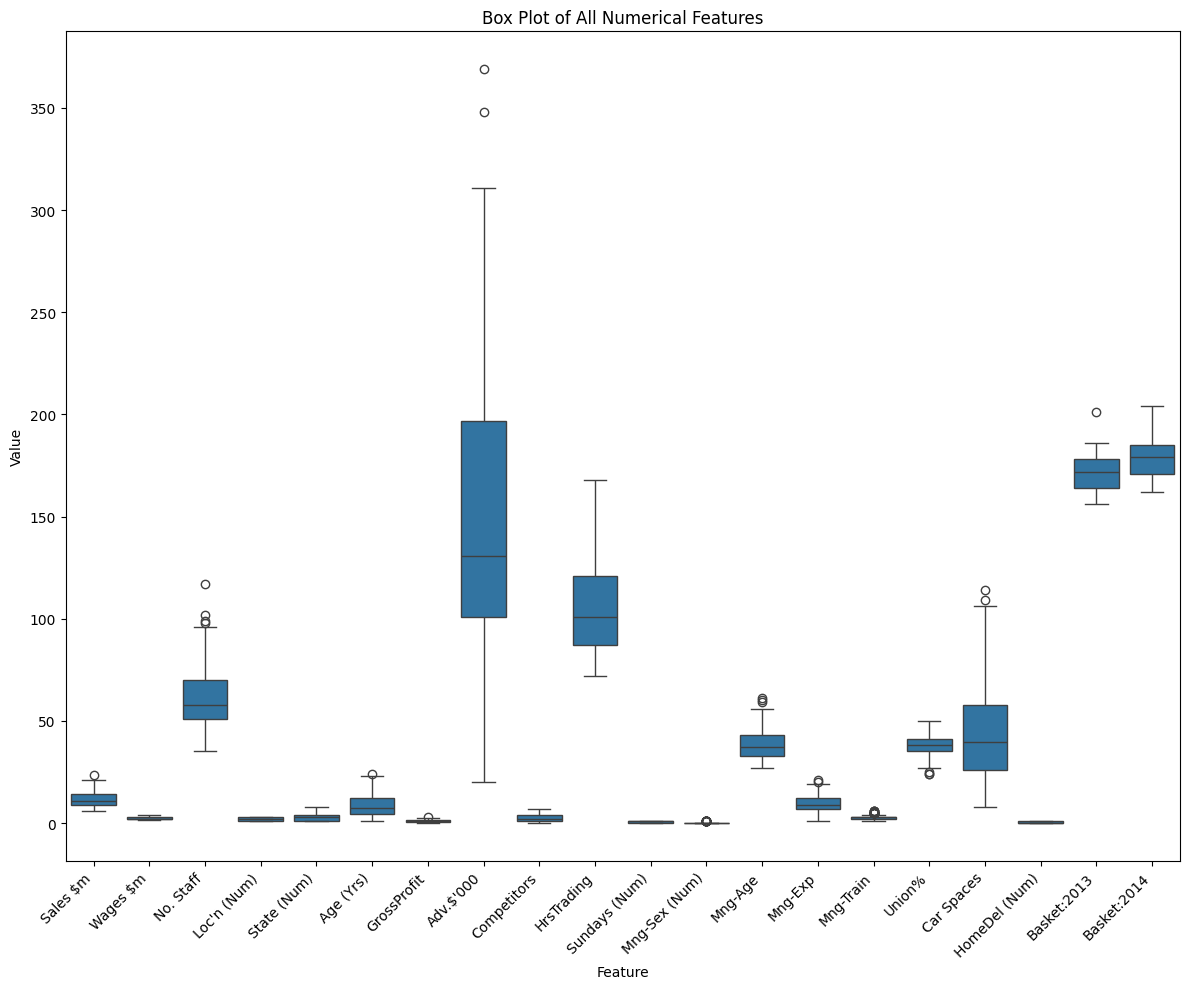

In [13]:
df_melted = n_df.melt(var_name='Feature', value_name='Value')
plt.figure(figsize=(12,10))
sns.boxplot(x='Feature', y='Value', data=df_melted)
plt.title('Box Plot of All Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
def remove_outliers(feature: pd.Series) -> pd.Series:
    
    # if the feature is not numerical
    if not pd.api.types.is_numeric_dtype(feature):
        print(f"Warning: Feature '{feature}' is not numerical. Returning Original series.")
        return feature
    
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    filterd_feature = feature[(feature >= lower_bound) & (feature <= upper_bound)]
    
    return filterd_feature
    

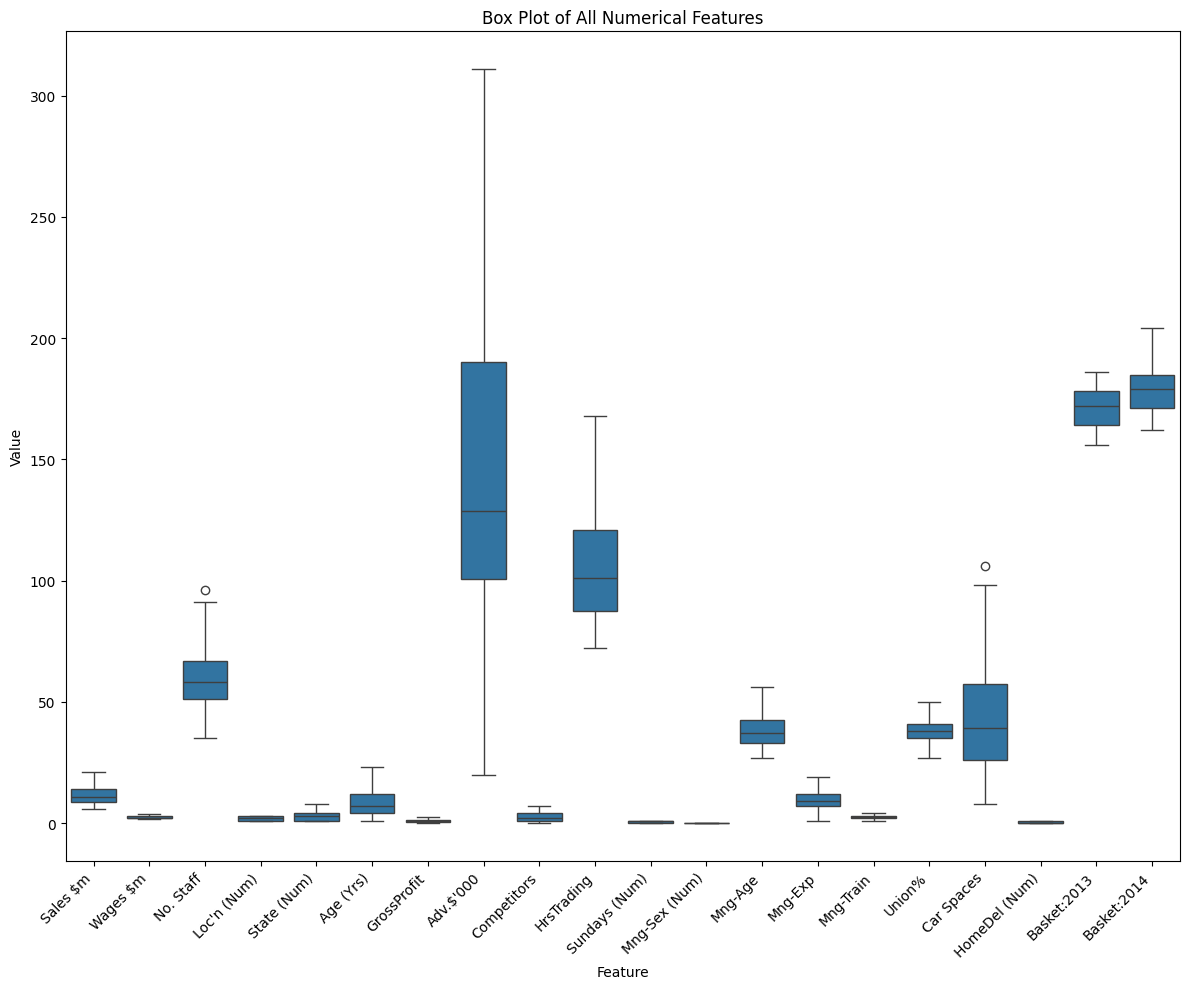

In [15]:
for col in n_df.columns:
    n_df[col] = remove_outliers(n_df[col])
    
df_melted = n_df.melt(var_name='Feature', value_name='Value')
plt.figure(figsize=(12,10))
sns.boxplot(x='Feature', y='Value', data=df_melted)
plt.title('Box Plot of All Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Missing Value Imputation

In [16]:
n_df.isnull().sum()

Sales $m          1
Wages $m          0
No. Staff         4
Loc'n (Num)       0
State (Num)       0
Age (Yrs)         1
GrossProfit       1
Adv.$'000         2
Competitors       0
HrsTrading        0
Sundays (Num)     0
Mng-Sex (Num)    25
Mng-Age           3
Mng-Exp           2
Mng-Train        16
Union%            3
Car Spaces        2
HomeDel (Num)     0
Basket:2013       1
Basket:2014       0
dtype: int64

In [17]:
for col in n_df.columns:
    if n_df[col].isnull().any():
        med_val = n_df[col].median()
        n_df[col].fillna(med_val, inplace=True)

C:\Users\KH&H\AppData\Local\Temp\ipykernel_7752\1896704324.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n_df[col].fillna(med_val, inplace=True)
C:\Users\KH&H\AppData\Local\Temp\ipykernel_7752\1896704324.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [18]:
# n_df = n_df.dropna()
n_df.isnull().sum()

Sales $m         0
Wages $m         0
No. Staff        0
Loc'n (Num)      0
State (Num)      0
Age (Yrs)        0
GrossProfit      0
Adv.$'000        0
Competitors      0
HrsTrading       0
Sundays (Num)    0
Mng-Sex (Num)    0
Mng-Age          0
Mng-Exp          0
Mng-Train        0
Union%           0
Car Spaces       0
HomeDel (Num)    0
Basket:2013      0
Basket:2014      0
dtype: int64

## Data Scaling

In [19]:
# Data is now cleaner and ready to be used in the methods

# time to scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(n_df)
X_scaled = pd.DataFrame(X_scaled, columns=n_df.columns)

In [378]:
X_scaled

,Sales $m,Wages $m,No. Staff,Loc'n (Num),State (Num),Age (Yrs),GrossProfit,Adv.$'000,Competitors,HrsTrading,Sundays (Num),Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel (Num),Basket:2013,Basket:2014
0,0.269994,-0.135461,-0.021018,0.113232,-1.076825,0.239797,-0.456259,0.424099,0.283727,0.154536,-1.277333,0.0,-0.747875,0.773310,-0.638658,-0.013366,0.134559,-0.654654,-0.080574,-0.098354
1,0.853974,0.571290,0.688350,0.113232,-0.547239,-0.138830,-1.449379,1.088898,1.433971,1.171593,-1.277333,0.0,-0.747875,1.839945,-1.866847,-0.013366,1.441428,-0.654654,-0.474684,-0.098354
2,2.167931,1.278041,1.476536,1.419755,-0.547239,-0.328143,0.124260,1.753697,-0.291395,-0.353992,0.782881,0.0,-1.200219,-0.026666,-0.638658,0.209408,1.005805,-0.654654,1.101757,1.063313
3,1.934338,0.394603,0.451894,0.113232,-0.017653,-0.328143,0.599230,2.260211,-0.866518,-0.904898,0.782881,0.0,-1.351000,-0.026666,-0.638658,-0.013366,1.102610,1.527525,0.182166,0.133979
4,-1.160759,-0.665524,-0.730386,-1.193291,-0.017653,1.186362,1.840230,-0.509785,-1.441640,-1.455804,0.782881,0.0,-0.295531,-1.359960,0.589531,0.432182,-0.688284,-0.654654,-0.737424,-0.911521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.737178,1.631417,2.185904,-1.193291,0.511933,-0.706769,-0.788898,1.722040,0.858849,0.747819,0.782881,0.0,0.609156,-0.026666,0.589531,-0.681690,0.957403,-0.654654,-1.131534,-0.795355
146,-1.014764,-1.195587,-0.178656,1.419755,-1.076825,1.943614,-0.880054,-1.966011,0.858849,1.383480,-1.277333,0.0,0.759938,0.773310,0.589531,0.877731,-0.397869,-0.654654,0.839017,0.830979
147,0.591183,0.924666,0.451894,-1.193291,1.041519,1.564988,2.595065,-0.652242,-0.291395,-0.184483,-1.277333,0.0,0.156813,-0.293325,0.589531,1.546055,0.231364,-0.654654,-0.737424,-0.795355
148,-0.459982,-0.665524,-0.415112,0.113232,1.041519,-0.138830,0.272988,-0.383156,0.283727,0.324046,-1.277333,0.0,2.116969,1.039969,0.589531,0.432182,-0.446272,-0.654654,0.313537,0.366312


In [379]:
# remove the mng-sex column
X_scaled.drop('Mng-Sex (Num)', axis=1, inplace=True)

In [380]:
X_scaled.isnull().sum()

Sales $m         0
Wages $m         0
No. Staff        0
Loc'n (Num)      0
State (Num)      0
Age (Yrs)        0
GrossProfit      0
Adv.$'000        0
Competitors      0
HrsTrading       0
Sundays (Num)    0
Mng-Age          0
Mng-Exp          0
Mng-Train        0
Union%           0
Car Spaces       0
HomeDel (Num)    0
Basket:2013      0
Basket:2014      0
dtype: int64

In [20]:
X_scaled = X_scaled.dropna()

# Original Data

## K-Medoids Clustering (Original Data)

In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

# elbow method to choose K
inertia = []
K_range = range(2, 21)

for k in K_range:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(X_scaled)
    inertia.append(kmedoids.inertia_)
    
# plot the elbow curve
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Medoids')

In [383]:
# we will choose 6 as the optimal k

optimal_k = 6
kmedoids = KMedoids(n_clusters=optimal_k, random_state=42)
kmedoids.fit(X_scaled)

n_df['KMedoids_Cluster'] = kmedoids.labels_

sil_score = silhouette_score(X_scaled, kmedoids.labels_)
print(f"K-Medoids Silhouette Score: {sil_score:.3f}")

K-Medoids Silhouette Score: 0.060


Tried k=6 and got score 0.041

In [384]:
# we will choose 3 as the optimal k

optimal_k = 3
kmedoids = KMedoids(n_clusters=optimal_k, random_state=42)
kmedoids.fit(X_scaled)

n_df['KMedoids_Cluster'] = kmedoids.labels_

sil_score = silhouette_score(X_scaled, kmedoids.labels_)
print(f"K-Medoids Silhouette Score: {sil_score:.3f}")

K-Medoids Silhouette Score: 0.061


Tried k = 3 and got higher value 0.074

In [385]:
# we will choose 3 as the optimal k

optimal_k = 15
kmedoids = KMedoids(n_clusters=optimal_k, random_state=42)
kmedoids.fit(X_scaled)

n_df['KMedoids_Cluster'] = kmedoids.labels_

sil_score = silhouette_score(X_scaled, kmedoids.labels_)
print(f"K-Medoids Silhouette Score: {sil_score:.3f}")

K-Medoids Silhouette Score: 0.036


In [386]:
# Why not to try choosing the best k that gives the best sil score

best_k = -1
best_score = -1

for k in K_range:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(X_scaled)
    
    labels = kmedoids.labels_
    
    sil_score = silhouette_score(X_scaled, labels=labels)
    
    if sil_score > best_score:
        best_score = sil_score
        best_k = k
    
    
print(f"Best K based on Silhouette Scores: {best_k}")
print(f"Best Silhouette Score: {best_score}")

Best K based on Silhouette Scores: 2
Best Silhouette Score: 0.07359861310447613


## Agglomerative Clustering (Original Data)

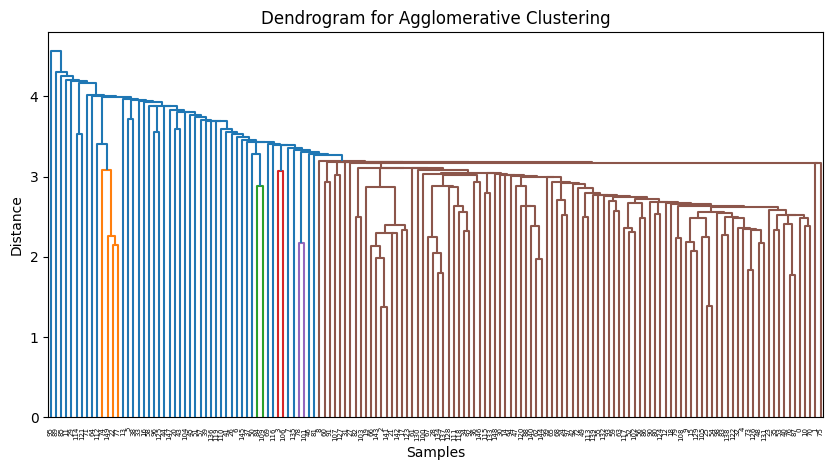

In [23]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X_scaled, method='single')
plt.figure(figsize=(10,5))
dendrogram(Z)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

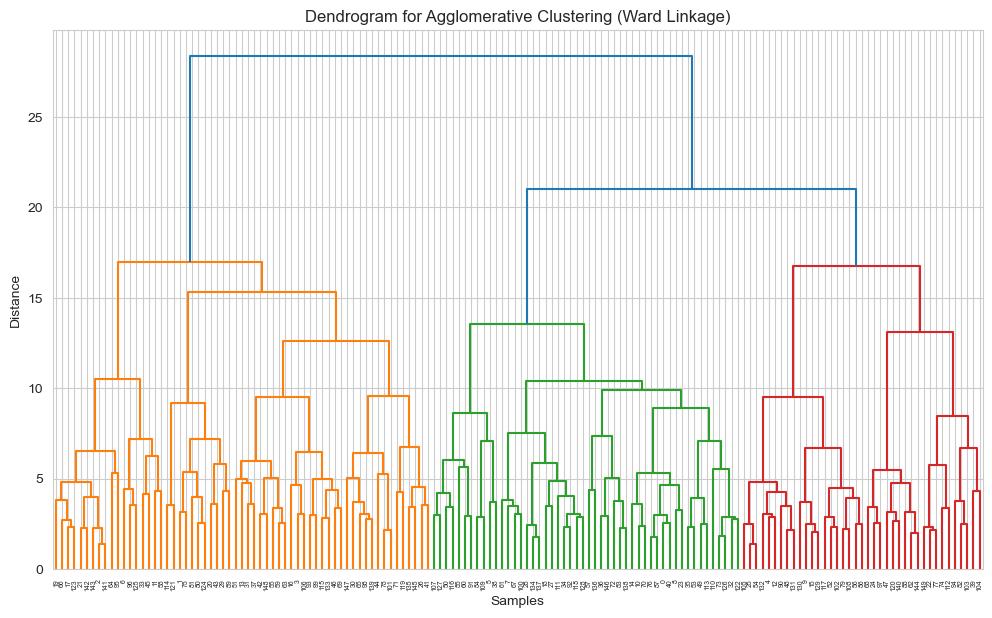

In [ ]:
Z_ward = linkage(X_scaled, method='ward') # Try 'ward', 'complete', or 'average'
#ward method minimizes the variance within each cluster
plt.figure(figsize=(12, 7))
dendrogram(Z_ward)
plt.title('Dendrogram for Agglomerative Clustering (Ward Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
# Add a line to suggest a cut (example height, adjust based on your plot)
# plt.axhline(y=10, color='r', linestyle='--') 
plt.show()

In [389]:
# I see that the best k to choose according to the dendogram is 5


agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward') 
labels = agg_clustering.fit_predict(X_scaled)
score = silhouette_score(X_scaled, labels)

print(f"I have got score: {score:.4f}, for k = 5")

I have got score: 0.0869, for k = 5


Calculating Silhouette Scores for Agglomerative Clustering...
  K=2, Silhouette Score: 0.1313
  K=3, Silhouette Score: 0.0907
  K=4, Silhouette Score: 0.0904
  K=5, Silhouette Score: 0.0869
  K=6, Silhouette Score: 0.0999
  K=7, Silhouette Score: 0.1044
  K=8, Silhouette Score: 0.1041
  K=9, Silhouette Score: 0.1088
  K=10, Silhouette Score: 0.1086
  K=11, Silhouette Score: 0.1078
  K=12, Silhouette Score: 0.1086
  K=13, Silhouette Score: 0.1115
  K=14, Silhouette Score: 0.1176
  K=15, Silhouette Score: 0.1132
  K=16, Silhouette Score: 0.1195
  K=17, Silhouette Score: 0.1179
  K=18, Silhouette Score: 0.1224
  K=19, Silhouette Score: 0.1259
  K=20, Silhouette Score: 0.1291

Best K for Agglomerative Clustering based on Silhouette Score: 2
Highest Silhouette Score: 0.1313


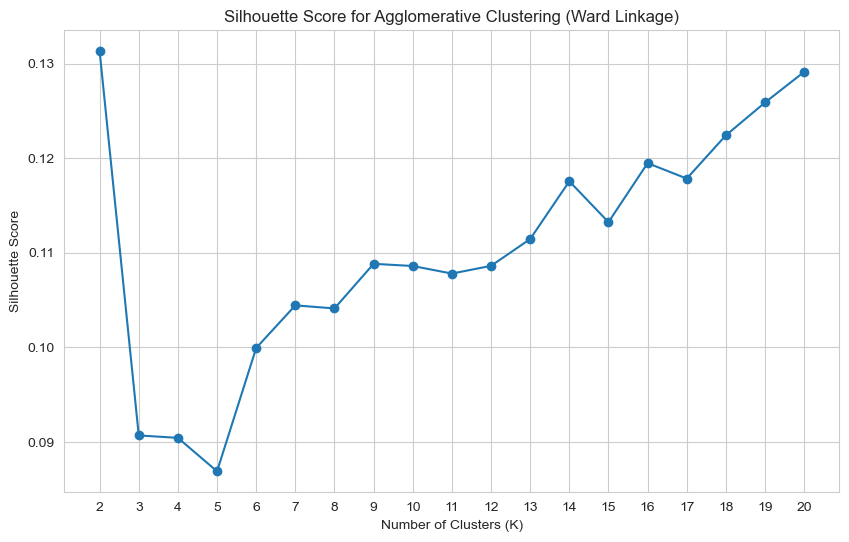

In [390]:

best_k_agg = -1
best_score_agg = -1
k_values_agg = range(2, 21) # Same range as before, or adjust as needed
silhouette_scores_agg = []

print("Calculating Silhouette Scores for Agglomerative Clustering...")
for k in k_values_agg:
    # Initialize and fit Agglomerative Clustering
    # Choose a linkage method, 'ward' is often a good default
    agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward') 
    labels = agg_clustering.fit_predict(X_scaled)
    
    # Calculate silhouette score (add the same safety check)
    if len(np.unique(labels)) > 1 and len(np.unique(labels)) < len(X_scaled):
        score = silhouette_score(X_scaled, labels)
        silhouette_scores_agg.append(score)
        print(f"  K={k}, Silhouette Score: {score:.4f}")
        
        # Check if this score is the best one so far
        if score > best_score_agg:
            best_score_agg = score
            best_k_agg = k
    else:
        silhouette_scores_agg.append(np.nan)
        print(f"  K={k}, Silhouette Score: Not calculable")

print(f"\nBest K for Agglomerative Clustering based on Silhouette Score: {best_k_agg}")
print(f"Highest Silhouette Score: {best_score_agg:.4f}")

# Optional: Plot Silhouette scores vs K
plt.figure(figsize=(10, 6))
plt.plot(k_values_agg, silhouette_scores_agg, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Agglomerative Clustering (Ward Linkage)')
plt.xticks(k_values_agg)
plt.grid(True)
plt.show()

# PCA

## Principal Component Analysis (PCA)

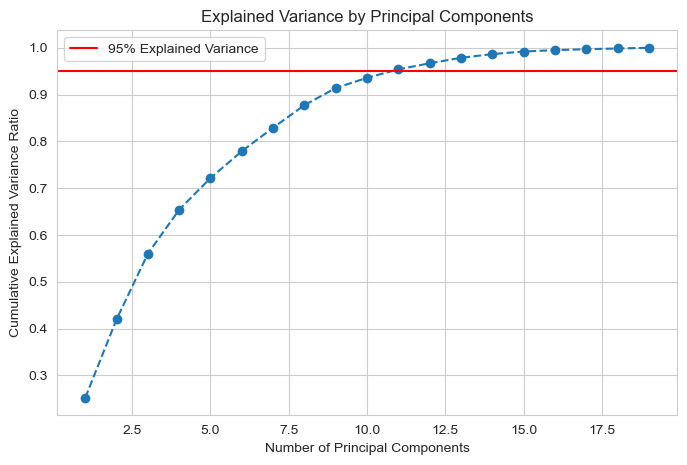

In [391]:
from sklearn.decomposition import PCA

# Apply PCA without specifying n_components to see explained variance
pca_full = PCA()
pca_full.fit(X_scaled)

# Calculate cumulative explained variance
explained_variance_ratio_cumulative = np.cumsum(pca_full.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
# Add a line for a potential threshold (e.g., 95% variance)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Explained Variance') 
plt.legend(loc='best')
plt.show()

In [392]:
# Choose the number of components (you decided on 10)
n_components_chosen = 2

# Initialize PCA with the chosen number of components
pca = PCA(n_components=n_components_chosen)

# Fit PCA to the scaled data and transform it
X_pca = pca.fit_transform(X_scaled)

# X_pca now contains your data transformed into 10 principal components
# You can convert it back to a DataFrame for easier viewing if needed
pca_columns = [f'PC{i+1}' for i in range(n_components_chosen)]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns, index=X_scaled.index) # Keep original index if needed

print(f"Shape of the data after PCA transformation: {X_pca.shape}")
print("First 5 rows of the PCA-transformed data:")
print(X_pca_df.head())

Shape of the data after PCA transformation: (150, 2)
First 5 rows of the PCA-transformed data:
        PC1       PC2
0  0.318863  0.366851
1  1.472127  2.442694
2  4.067939  0.792390
3  2.836747  0.367874
4 -2.026550 -1.173534


## K-Medoids Clustering (PCA Data)

In [393]:
# Apply K-Medoids on PCA-transformed data

# Find the best K using silhouette score on X_pca
best_k_pca = -1
best_score_pca = -1
silhouette_scores_pca_kmedoids = [] # Store scores for plotting
K_range = range(2, 21) # Or your desired range

print("Calculating Silhouette Scores for K-Medoids on PCA data...")
for k in K_range:
    kmedoids_pca = KMedoids(n_clusters=k, random_state=42)
    labels_pca = kmedoids_pca.fit_predict(X_pca) # Use X_pca here

    # Calculate silhouette score
    # Ensure there's more than 1 cluster and fewer clusters than samples
    if len(np.unique(labels_pca)) > 1 and len(np.unique(labels_pca)) < len(X_pca):
        score_pca = silhouette_score(X_pca, labels_pca) # Use X_pca here
        silhouette_scores_pca_kmedoids.append(score_pca)
        print(f"  K={k}, Silhouette Score: {score_pca:.4f}")

        if score_pca > best_score_pca:
            best_score_pca = score_pca
            best_k_pca = k
    else:
        silhouette_scores_pca_kmedoids.append(np.nan) # Handle cases where score isn't calculable
        print(f"  K={k}, Silhouette Score: Not calculable")


print(f"\nBest K for K-Medoids on PCA data: {best_k_pca}")
print(f"Best Silhouette Score on PCA data: {best_score_pca:.4f}")

Calculating Silhouette Scores for K-Medoids on PCA data...
  K=2, Silhouette Score: 0.3441
  K=3, Silhouette Score: 0.3309
  K=4, Silhouette Score: 0.3937
  K=5, Silhouette Score: 0.3413
  K=6, Silhouette Score: 0.3648
  K=7, Silhouette Score: 0.3483
  K=8, Silhouette Score: 0.3609
  K=9, Silhouette Score: 0.3396
  K=10, Silhouette Score: 0.2928
  K=11, Silhouette Score: 0.2673
  K=12, Silhouette Score: 0.2758
  K=13, Silhouette Score: 0.2527
  K=14, Silhouette Score: 0.2211
  K=15, Silhouette Score: 0.2496
  K=16, Silhouette Score: 0.2184
  K=17, Silhouette Score: 0.2158
  K=18, Silhouette Score: 0.2229
  K=19, Silhouette Score: 0.2679
  K=20, Silhouette Score: 0.2077

Best K for K-Medoids on PCA data: 4
Best Silhouette Score on PCA data: 0.3937


In [394]:
kmedoids_pca_final = KMedoids(n_clusters=4, random_state=42)
labels_pca = kmedoids_pca_final.fit_predict(X_pca) # Use X_pca here
score_pca = silhouette_score(X_pca, labels_pca) # Use X_pca here

X_pca_labeled = X_pca
X_pca_labeled = pd.DataFrame(X_pca_labeled)
X_pca_labeled['K-Medoids Cluster PCA'] = labels_pca

In [395]:
X_pca_labeled

,0,1,K-Medoids Cluster PCA
0,0.318863,0.366851,2
1,1.472127,2.442694,1
2,4.067939,0.792390,0
3,2.836747,0.367874,0
4,-2.026550,-1.173534,3
...,...,...,...
145,0.821127,3.868706,1
146,-1.337054,-0.905478,2
147,-0.454357,1.056868,1
148,-0.882680,-0.145418,2


## Agglomerative Clustering (PCA Data)

In [396]:
# Apply Agglomerative Clustering on PCA-transformed data

best_k_agg_pca = -1
best_score_agg_pca = -1
k_values_agg_pca = range(2, 21) # Same range or adjust as needed
silhouette_scores_agg_pca = []

print("Calculating Silhouette Scores for Agglomerative Clustering on PCA data...")
for k in k_values_agg_pca:
    # Initialize and fit Agglomerative Clustering on PCA data
    # Using 'ward' linkage is common, but you could experiment
    agg_clustering_pca = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels_agg_pca = agg_clustering_pca.fit_predict(X_pca) # Use X_pca here

    # Calculate silhouette score using X_pca
    if len(np.unique(labels_agg_pca)) > 1 and len(np.unique(labels_agg_pca)) < len(X_pca):
        score_agg_pca = silhouette_score(X_pca, labels_agg_pca) # Use X_pca here
        silhouette_scores_agg_pca.append(score_agg_pca)
        print(f"  K={k}, Silhouette Score: {score_agg_pca:.4f}")

        # Check if this score is the best one so far
        if score_agg_pca > best_score_agg_pca:
            best_score_agg_pca = score_agg_pca
            best_k_agg_pca = k
    else:
        silhouette_scores_agg_pca.append(np.nan)
        print(f"  K={k}, Silhouette Score: Not calculable")

print(f"\nBest K for Agglomerative Clustering on PCA data: {best_k_agg_pca}")
print(f"Highest Silhouette Score: {best_score_agg_pca:.4f}")


Calculating Silhouette Scores for Agglomerative Clustering on PCA data...
  K=2, Silhouette Score: 0.3418
  K=3, Silhouette Score: 0.3261
  K=4, Silhouette Score: 0.3562
  K=5, Silhouette Score: 0.3757
  K=6, Silhouette Score: 0.3616
  K=7, Silhouette Score: 0.3449
  K=8, Silhouette Score: 0.3446
  K=9, Silhouette Score: 0.3419
  K=10, Silhouette Score: 0.3381
  K=11, Silhouette Score: 0.3368
  K=12, Silhouette Score: 0.3338
  K=13, Silhouette Score: 0.3342
  K=14, Silhouette Score: 0.3379
  K=15, Silhouette Score: 0.3443
  K=16, Silhouette Score: 0.3321
  K=17, Silhouette Score: 0.3268
  K=18, Silhouette Score: 0.3247
  K=19, Silhouette Score: 0.3271
  K=20, Silhouette Score: 0.3277

Best K for Agglomerative Clustering on PCA data: 5
Highest Silhouette Score: 0.3757


In [397]:
agg_clustering_pca_final = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels_agg_pca_final = agg_clustering_pca_final.fit_predict(X_pca) # Use X_pca here
score_agg_pca = silhouette_score(X_pca, labels_agg_pca_final) # Use X_pca here
X_pca_labeled['AgglomerativeClustering Cluster PCA'] = labels_agg_pca_final

In [398]:
X_pca_labeled

,0,1,K-Medoids Cluster PCA,AgglomerativeClustering Cluster PCA
0,0.318863,0.366851,2,1
1,1.472127,2.442694,1,4
2,4.067939,0.792390,0,3
3,2.836747,0.367874,0,3
4,-2.026550,-1.173534,3,0
...,...,...,...,...
145,0.821127,3.868706,1,4
146,-1.337054,-0.905478,2,0
147,-0.454357,1.056868,1,1
148,-0.882680,-0.145418,2,0


## Cluster Visualization (PCA Data)

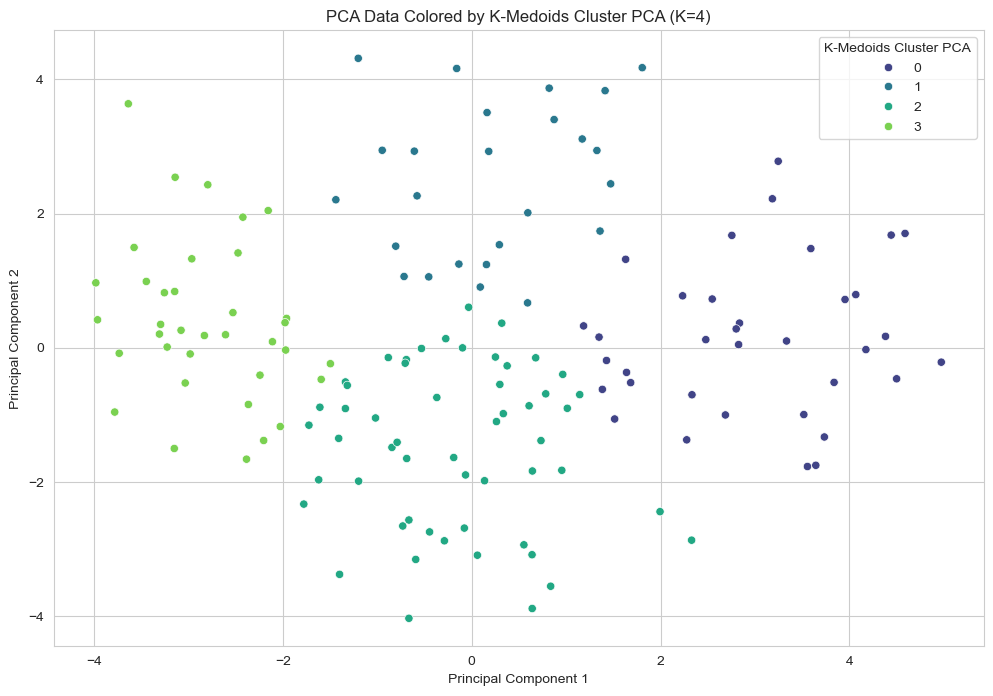

In [399]:
num_clusters_kmedoids = 4
plt.figure(figsize=(12,8))
sns.scatterplot(
    data = X_pca_labeled, x = X_pca_labeled.columns[0], y=X_pca_labeled.columns[1],
    hue='K-Medoids Cluster PCA',
    palette=sns.color_palette('viridis', n_colors=num_clusters_kmedoids),
    legend='full'
)

plt.title(f'PCA Data Colored by K-Medoids Cluster PCA (K={num_clusters_kmedoids})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

C:\Users\mmakw\AppData\Local\Temp\ipykernel_47236\1921336175.py:9: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  scatter_plot = sns.scatterplot(data=X_pca_labeled, x=X_pca_labeled.columns[0], y=X_pca_labeled.columns[1],


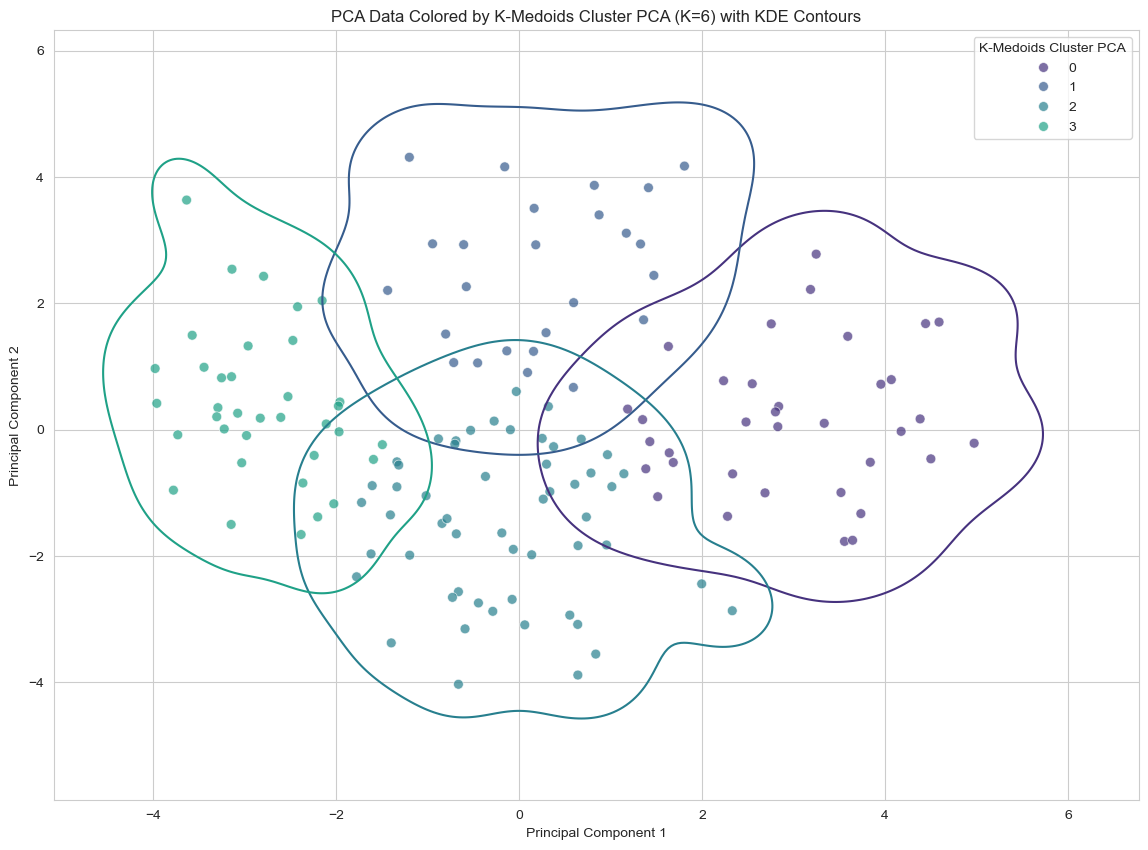

In [400]:
# Get the number of clusters and unique labels
num_clusters_kmedoids = 6 # Should be 6
cluster_labels_kmedoids = np.unique(X_pca_labeled['K-Medoids Cluster PCA'])
colors = sns.color_palette('viridis', n_colors=num_clusters_kmedoids)

plt.figure(figsize=(14, 10)) # Slightly larger figure

# 1. Create the scatter plot first
scatter_plot = sns.scatterplot(data=X_pca_labeled, x=X_pca_labeled.columns[0], y=X_pca_labeled.columns[1],
                               hue='K-Medoids Cluster PCA',
                               palette=colors, # Use the defined palette
                               legend='full',
                               s=50, # Adjust point size if needed
                               alpha=0.7) # Make points slightly transparent

# 2. Overlay KDE contours for each cluster
for i, label in enumerate(cluster_labels_kmedoids):
    # Filter data for the current cluster
    cluster_data = X_pca_labeled[X_pca_labeled['K-Medoids Cluster PCA'] == label]

    # Add KDE plot for this cluster's data
    # Use levels=[0.1] or similar to draw an outer contour, adjust as needed
    sns.kdeplot(data=cluster_data, x=cluster_data.columns[0], y=cluster_data.columns[1],
                color=colors[i], # Match scatter plot color
                levels=[0.05], # Draw contour at this density level (adjust 0.15 for desired tightness)
                linewidths=1.5,
                ax=scatter_plot) # Draw on the same axes as the scatter plot

plt.title(f'PCA Data Colored by K-Medoids Cluster PCA (K={num_clusters_kmedoids}) with KDE Contours')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='K-Medoids Cluster PCA') # Ensure legend is clear
plt.show()

In [401]:
X_pca_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   0                                    150 non-null    float64
 1   1                                    150 non-null    float64
 2   K-Medoids Cluster PCA                150 non-null    int64  
 3   AgglomerativeClustering Cluster PCA  150 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 4.8 KB


In [416]:
df['K-Medoids Cluster PCA']= X_pca_labeled['K-Medoids Cluster PCA']

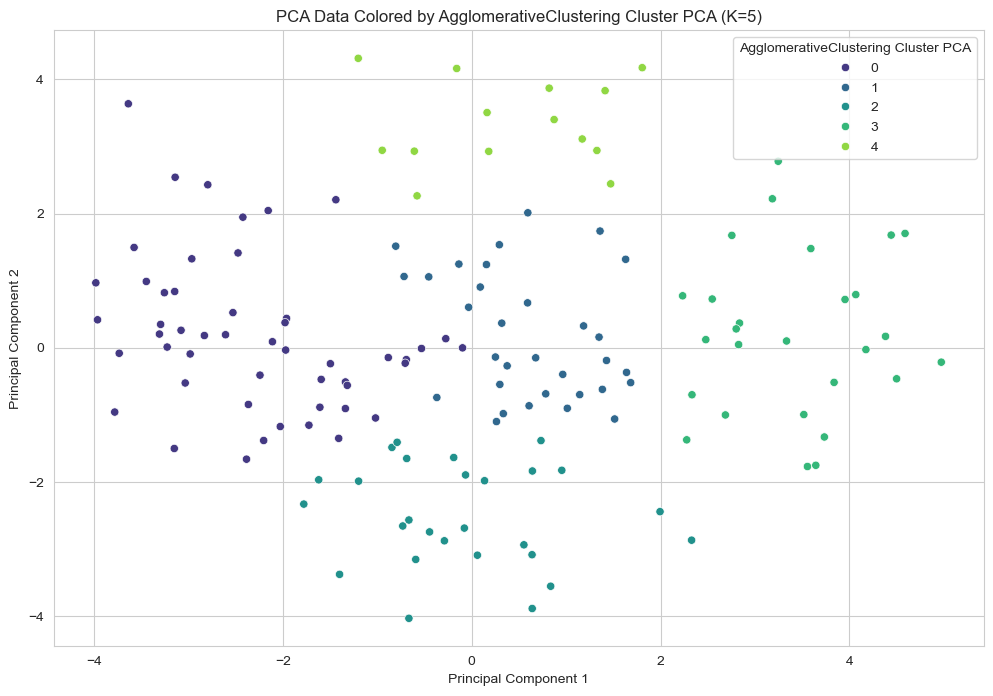

In [402]:
num_clusters_agglomerative = 5
plt.figure(figsize=(12,8))
sns.scatterplot(
    data = X_pca_labeled, x = X_pca_labeled.columns[0], y=X_pca_labeled.columns[1],
    hue='AgglomerativeClustering Cluster PCA',
    palette=sns.color_palette('viridis', n_colors=num_clusters_agglomerative),
    legend='full'
)

plt.title(f'PCA Data Colored by AgglomerativeClustering Cluster PCA (K={num_clusters_agglomerative})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

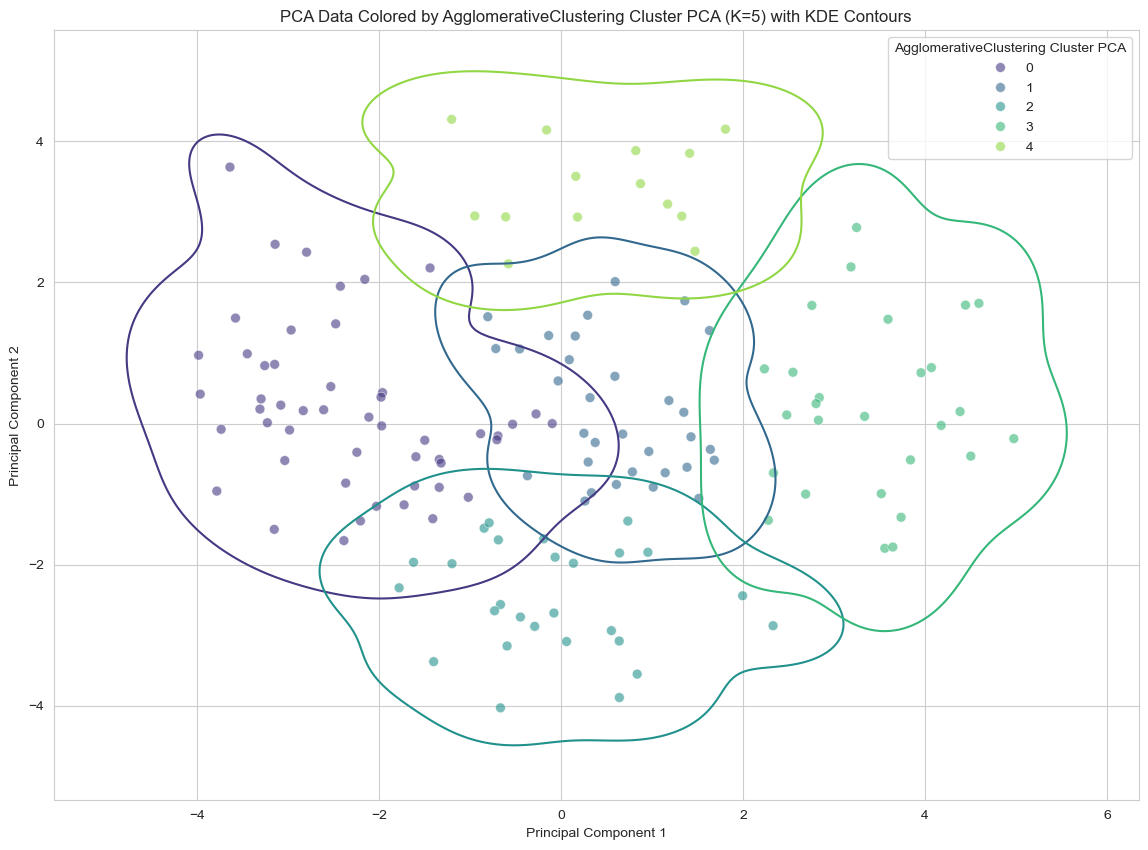

In [ ]:
num_clusters_agglomerative = 5 
cluster_labels_agglomerative = np.unique(X_pca_labeled['AgglomerativeClustering Cluster PCA'])
colors = sns.color_palette('viridis', n_colors=num_clusters_agglomerative)

plt.figure(figsize=(14, 10)) 


scatter_plot = sns.scatterplot(data=X_pca_labeled, x=X_pca_labeled.columns[0], y=X_pca_labeled.columns[1],
                               hue='AgglomerativeClustering Cluster PCA',
                               palette=colors, # Use the defined palette
                               legend='full',
                               s=50, # Adjust point size if needed
                               alpha=0.6) 


for i, label in enumerate(cluster_labels_agglomerative):
    cluster_data = X_pca_labeled[X_pca_labeled['AgglomerativeClustering Cluster PCA'] == label]


    sns.kdeplot(data=cluster_data, x=cluster_data.columns[0], y=cluster_data.columns[1],
                color=colors[i], 
                levels=[0.05], 
                linewidths=1.5,
                ax=scatter_plot) 

plt.title(f'PCA Data Colored by AgglomerativeClustering Cluster PCA (K={num_clusters_agglomerative}) with KDE Contours')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='AgglomerativeClustering Cluster PCA') 
plt.show()

# Feature Selection

In [404]:
# Feature Selection

X_scaled

,Sales $m,Wages $m,No. Staff,Loc'n (Num),State (Num),Age (Yrs),GrossProfit,Adv.$'000,Competitors,HrsTrading,Sundays (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel (Num),Basket:2013,Basket:2014
0,0.269994,-0.135461,-0.021018,0.113232,-1.076825,0.239797,-0.456259,0.424099,0.283727,0.154536,-1.277333,-0.747875,0.773310,-0.638658,-0.013366,0.134559,-0.654654,-0.080574,-0.098354
1,0.853974,0.571290,0.688350,0.113232,-0.547239,-0.138830,-1.449379,1.088898,1.433971,1.171593,-1.277333,-0.747875,1.839945,-1.866847,-0.013366,1.441428,-0.654654,-0.474684,-0.098354
2,2.167931,1.278041,1.476536,1.419755,-0.547239,-0.328143,0.124260,1.753697,-0.291395,-0.353992,0.782881,-1.200219,-0.026666,-0.638658,0.209408,1.005805,-0.654654,1.101757,1.063313
3,1.934338,0.394603,0.451894,0.113232,-0.017653,-0.328143,0.599230,2.260211,-0.866518,-0.904898,0.782881,-1.351000,-0.026666,-0.638658,-0.013366,1.102610,1.527525,0.182166,0.133979
4,-1.160759,-0.665524,-0.730386,-1.193291,-0.017653,1.186362,1.840230,-0.509785,-1.441640,-1.455804,0.782881,-0.295531,-1.359960,0.589531,0.432182,-0.688284,-0.654654,-0.737424,-0.911521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.737178,1.631417,2.185904,-1.193291,0.511933,-0.706769,-0.788898,1.722040,0.858849,0.747819,0.782881,0.609156,-0.026666,0.589531,-0.681690,0.957403,-0.654654,-1.131534,-0.795355
146,-1.014764,-1.195587,-0.178656,1.419755,-1.076825,1.943614,-0.880054,-1.966011,0.858849,1.383480,-1.277333,0.759938,0.773310,0.589531,0.877731,-0.397869,-0.654654,0.839017,0.830979
147,0.591183,0.924666,0.451894,-1.193291,1.041519,1.564988,2.595065,-0.652242,-0.291395,-0.184483,-1.277333,0.156813,-0.293325,0.589531,1.546055,0.231364,-0.654654,-0.737424,-0.795355
148,-0.459982,-0.665524,-0.415112,0.113232,1.041519,-0.138830,0.272988,-0.383156,0.283727,0.324046,-1.277333,2.116969,1.039969,0.589531,0.432182,-0.446272,-0.654654,0.313537,0.366312


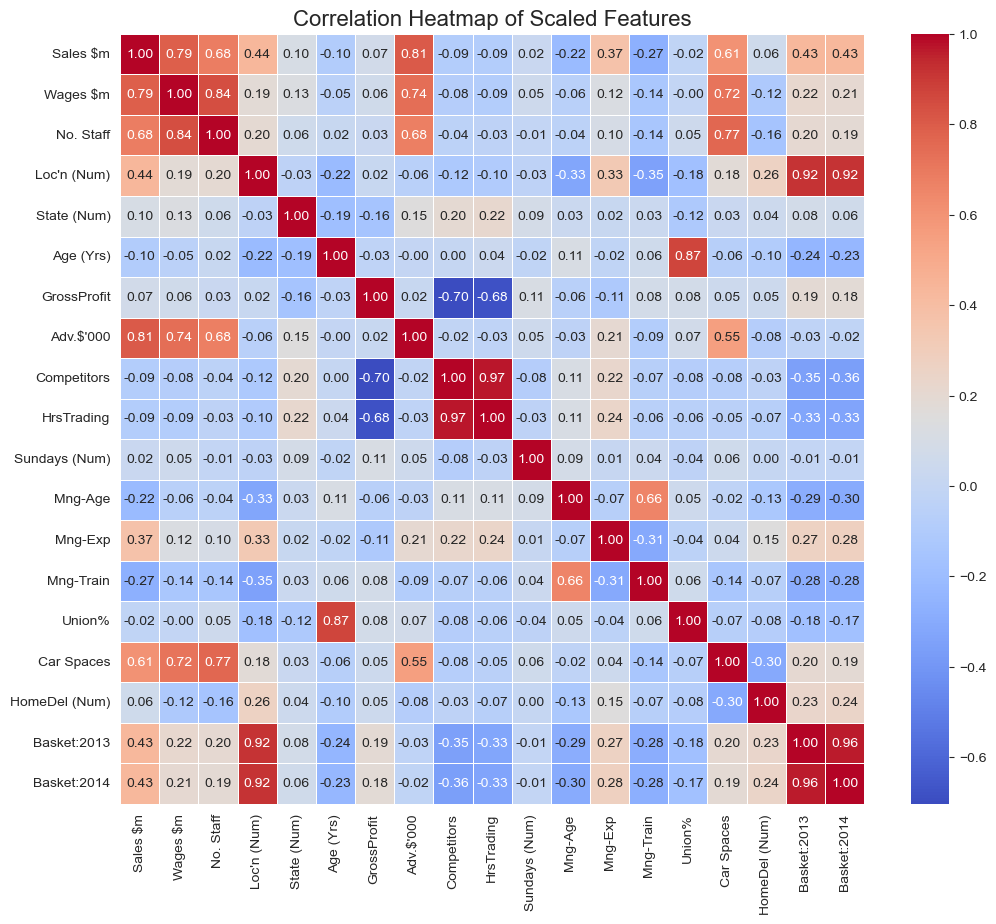

In [405]:
correlation_matrix = X_scaled.corr()
plt.figure(figsize=(12, 10)) 

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Scaled Features', fontsize=16)
plt.show()

In [406]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(len(X_scaled.columns))]

print("VIF Scores:")
print(vif_data.sort_values(by='VIF', ascending=False))


VIF Scores:
          feature        VIF
8     Competitors  19.946794
3     Loc'n (Num)  19.911986
9      HrsTrading  18.214847
17    Basket:2013  17.954275
18    Basket:2014  17.803291
0        Sales $m  12.905451
7       Adv.$'000   8.816661
1        Wages $m   5.779013
5       Age (Yrs)   5.126964
2       No. Staff   5.006579
14         Union%   4.918229
15     Car Spaces   3.191597
6     GrossProfit   2.184160
13      Mng-Train   2.174755
11        Mng-Age   2.107212
4     State (Num)   1.743202
12        Mng-Exp   1.694419
16  HomeDel (Num)   1.359952
10  Sundays (Num)   1.096186


In [407]:
removed_cols = []
vif_threshold = 10
X_vif = X_scaled.copy()

while True:
    vif_data = pd.DataFrame()
    vif_data['feature'] = X_vif.columns
    
    try:
        if X_vif.shape[1] < 2:
            print('Less than 2 features remaining.')
            break
        vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
        
    except Exception as e:
        print(f'Error calculating VIF: {e}')
        break
    
    max_vif = vif_data['VIF'].max()
    max_feature = vif_data.loc[vif_data['VIF'].idxmax(), 'feature']
    
    if max_vif > vif_threshold:
        print(f"Removing feature '{max_feature}' with VIF: {max_vif:.2f}")
        X_vif = X_vif.drop(columns=[max_feature])
        removed_cols.append(max_feature)
    else:
        print('All remaining features are under the threshold')
        break
    
    
    
print("\nFinal features after VIF selection:")
print(X_vif.columns.tolist())
print("\nRemoved features:")
print(removed_cols)


Removing feature 'Competitors' with VIF: 19.95
Removing feature 'Loc'n (Num)' with VIF: 19.74
Removing feature 'Basket:2014' with VIF: 14.05
Removing feature 'Sales $m' with VIF: 10.35
All remaining features are under the threshold

Final features after VIF selection:
['Wages $m', 'No. Staff', 'State (Num)', 'Age (Yrs)', 'GrossProfit', "Adv.$'000", 'HrsTrading', 'Sundays (Num)', 'Mng-Age', 'Mng-Exp', 'Mng-Train', 'Union%', 'Car Spaces', 'HomeDel (Num)', 'Basket:2013']

Removed features:
['Competitors', "Loc'n (Num)", 'Basket:2014', 'Sales $m']


In [408]:
X_vif

,Wages $m,No. Staff,State (Num),Age (Yrs),GrossProfit,Adv.$'000,HrsTrading,Sundays (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel (Num),Basket:2013
0,-0.135461,-0.021018,-1.076825,0.239797,-0.456259,0.424099,0.154536,-1.277333,-0.747875,0.773310,-0.638658,-0.013366,0.134559,-0.654654,-0.080574
1,0.571290,0.688350,-0.547239,-0.138830,-1.449379,1.088898,1.171593,-1.277333,-0.747875,1.839945,-1.866847,-0.013366,1.441428,-0.654654,-0.474684
2,1.278041,1.476536,-0.547239,-0.328143,0.124260,1.753697,-0.353992,0.782881,-1.200219,-0.026666,-0.638658,0.209408,1.005805,-0.654654,1.101757
3,0.394603,0.451894,-0.017653,-0.328143,0.599230,2.260211,-0.904898,0.782881,-1.351000,-0.026666,-0.638658,-0.013366,1.102610,1.527525,0.182166
4,-0.665524,-0.730386,-0.017653,1.186362,1.840230,-0.509785,-1.455804,0.782881,-0.295531,-1.359960,0.589531,0.432182,-0.688284,-0.654654,-0.737424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1.631417,2.185904,0.511933,-0.706769,-0.788898,1.722040,0.747819,0.782881,0.609156,-0.026666,0.589531,-0.681690,0.957403,-0.654654,-1.131534
146,-1.195587,-0.178656,-1.076825,1.943614,-0.880054,-1.966011,1.383480,-1.277333,0.759938,0.773310,0.589531,0.877731,-0.397869,-0.654654,0.839017
147,0.924666,0.451894,1.041519,1.564988,2.595065,-0.652242,-0.184483,-1.277333,0.156813,-0.293325,0.589531,1.546055,0.231364,-0.654654,-0.737424
148,-0.665524,-0.415112,1.041519,-0.138830,0.272988,-0.383156,0.324046,-1.277333,2.116969,1.039969,0.589531,0.432182,-0.446272,-0.654654,0.313537


In [410]:
print(len(X_vif.columns))

15


## Implementing K-Medoids and Agglomerative Clustering after feature selection

In [412]:
# Find the best K using silhouette score on X_VIF
best_k_vif = -1
best_score_vif = -1
silhouette_scores_vif_kmedoids = [] # Store scores for plotting
K_range = range(2, 21) # Or your desired range

print("Calculating Silhouette Scores for K-Medoids on VIF data...")
for k in K_range:
    kmedoids_vif = KMedoids(n_clusters=k, random_state=42)
    labels_vif = kmedoids_vif.fit_predict(X_vif) # Use X_vif here

    # Calculate silhouette score
    # Ensure there's more than 1 cluster and fewer clusters than samples
    if len(np.unique(labels_vif)) > 1 and len(np.unique(labels_vif)) < len(X_vif):
        score_vif = silhouette_score(X_vif, labels_vif) # Use X_vif here
        silhouette_scores_vif_kmedoids.append(score_vif)
        print(f"  K={k}, Silhouette Score: {score_vif:.4f}")

        if score_vif > best_score_vif:
            best_score_vif = score_vif
            best_k_vif = k
    else:
        silhouette_scores_vif_kmedoids.append(np.nan) # Handle cases where score isn't calculable
        print(f"  K={k}, Silhouette Score: Not calculable")


print(f"\nBest K for K-Medoids on VIF data: {best_k_vif}")
print(f"Best Silhouette Score on VIF data: {best_score_vif:.4f}")

Calculating Silhouette Scores for K-Medoids on VIF data...
  K=2, Silhouette Score: 0.0828
  K=3, Silhouette Score: 0.0611
  K=4, Silhouette Score: 0.0420
  K=5, Silhouette Score: 0.0423
  K=6, Silhouette Score: 0.0554
  K=7, Silhouette Score: 0.0494
  K=8, Silhouette Score: 0.0490
  K=9, Silhouette Score: 0.0403
  K=10, Silhouette Score: 0.0424
  K=11, Silhouette Score: 0.0269
  K=12, Silhouette Score: 0.0241
  K=13, Silhouette Score: 0.0243
  K=14, Silhouette Score: 0.0285
  K=15, Silhouette Score: 0.0337
  K=16, Silhouette Score: 0.0345
  K=17, Silhouette Score: 0.0291
  K=18, Silhouette Score: 0.0269
  K=19, Silhouette Score: 0.0245
  K=20, Silhouette Score: 0.0134

Best K for K-Medoids on VIF data: 2
Best Silhouette Score on VIF data: 0.0828


Best K for Agglomerative Clustering on VIF data: 2
Highest Silhouette Score: 0.1441


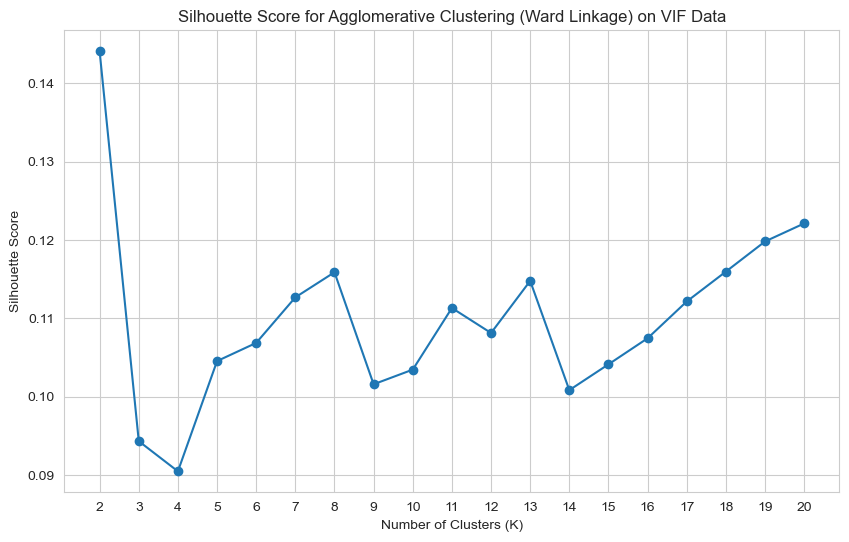

In [415]:
# filepath: f:\Obsidian\Back\2- Courses\Data Mining\Project\thebestever.ipynb
# Add this code after the K-Medoids on VIF section

# --- Agglomerative Clustering on VIF Data ---
best_k_agg_vif = -1
best_score_agg_vif = -1
k_values_agg_vif = range(2, 21) 
silhouette_scores_agg_vif = []

for k in k_values_agg_vif:
    agg_clustering_vif = AgglomerativeClustering(n_clusters=k, linkage='ward') 
    labels_agg_vif = agg_clustering_vif.fit_predict(X_vif) # Use X_vif
    
    if len(np.unique(labels_agg_vif)) > 1 and len(np.unique(labels_agg_vif)) < len(X_vif):
        score_agg_vif = silhouette_score(X_vif, labels_agg_vif) # Use X_vif
        silhouette_scores_agg_vif.append(score_agg_vif)
        
        if score_agg_vif > best_score_agg_vif:
            best_score_agg_vif = score_agg_vif
            best_k_agg_vif = k
    else:
        silhouette_scores_agg_vif.append(np.nan)
        
print(f"Best K for Agglomerative Clustering on VIF data: {best_k_agg_vif}")
print(f"Highest Silhouette Score: {best_score_agg_vif:.4f}")

# Optional: Plot Silhouette scores vs K
plt.figure(figsize=(10, 6))
plt.plot(k_values_agg_vif, silhouette_scores_agg_vif, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Agglomerative Clustering (Ward Linkage) on VIF Data')
plt.xticks(k_values_agg_vif)
plt.grid(True)
plt.show()

We got the best results when used PCA

# Visulaization

In [417]:
df

,Sales $m,Wages $m,No. Staff,Location,Loc'n (Num),State,State (Num),Age (Yrs),GrossProfit,Adv.$'000,...,Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel,HomeDel (Num),Basket:2013,Basket:2014,K-Medoids Cluster PCA
0,12.5,2.3,60,Mall,2,NSW,1,10,0.712,171,...,33,12,2,38,46,Del:No,0,171,178,2
1,14.5,2.7,69,Mall,2,Vic,2,8,0.091,213,...,33,16,1,38,73,Del:No,0,168,178,1
2,19.0,3.1,79,Country,3,Vic,2,7,1.075,255,...,30,9,2,39,64,Del:No,0,180,188,0
3,18.2,2.6,66,Mall,2,Qld,3,7,1.372,287,...,29,9,2,38,66,Del:Yes,1,173,180,0
4,7.6,2.0,51,Strip,1,Qld,3,15,2.148,112,...,36,4,3,40,29,Del:No,0,166,171,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,14.1,3.3,88,Strip,1,SA,4,5,0.504,253,...,42,9,3,35,63,Del:No,0,163,172,1
146,8.1,1.7,58,Country,3,NSW,1,19,0.447,20,...,43,12,3,42,35,Del:No,0,178,186,2
147,13.6,2.9,66,Strip,1,WA,5,17,2.620,103,...,39,8,3,45,48,Del:No,0,166,172,1
148,10.0,2.0,55,Mall,2,WA,5,8,1.168,120,...,52,13,3,40,34,Del:No,0,174,182,2


In [418]:
numerical_df = df.select_dtypes(include=np.number)

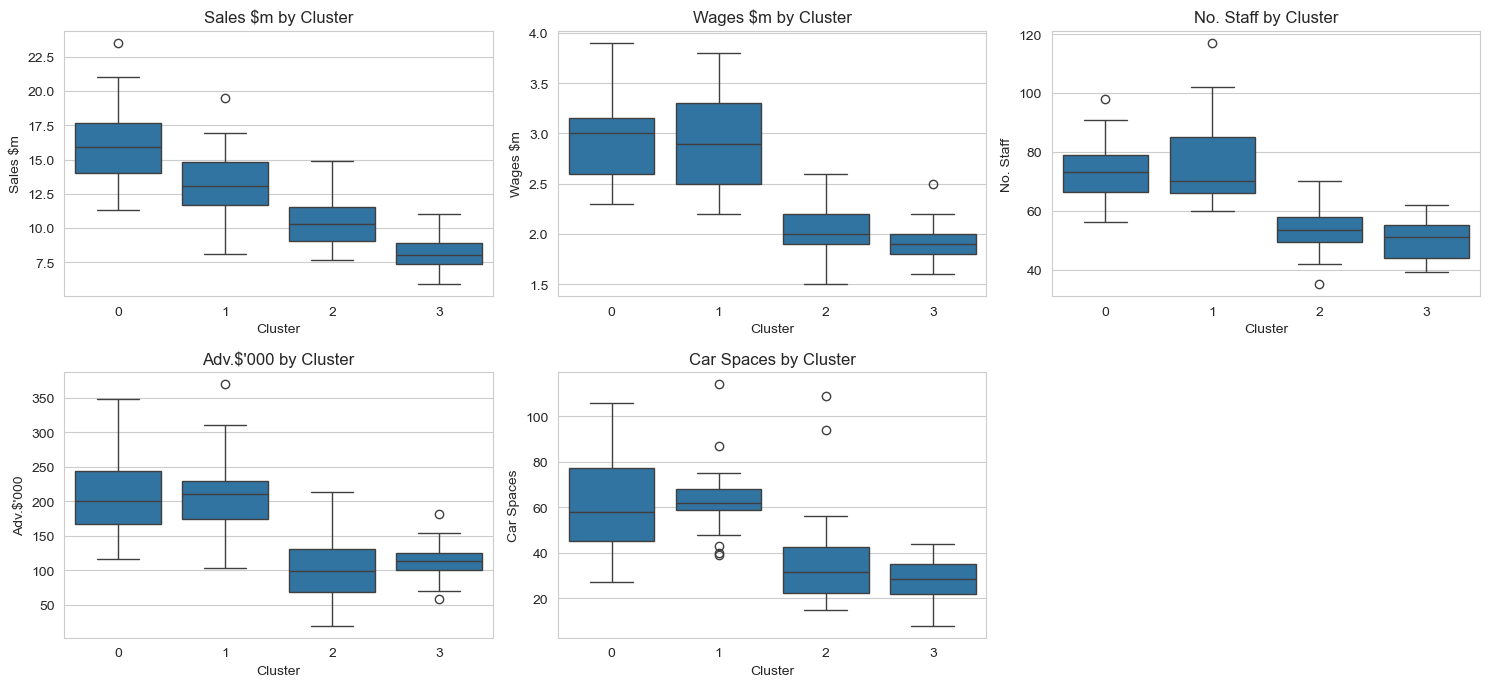

In [420]:
# Features identified as potentially differentiating Cluster 1
features_to_plot = [
    'Sales $m',
    'Wages $m',
    'No. Staff',
    'Adv.$\'000',
    'Car Spaces'
]

# Create box plots for each feature, grouped by cluster
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(3, 3, i + 1) # Adjust layout if needed
    sns.boxplot(x='K-Medoids Cluster PCA', y=feature, data=numerical_df)
    plt.title(f'{feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

It seems that the first one is the best, having the best amount of sales and the largest area for car spaces and for the store itself (high median number of staff)

In [424]:
best_cluster = df[numerical_df['K-Medoids Cluster PCA']==0]

In [425]:
best_cluster.describe()

,Sales $m,Wages $m,No. Staff,Loc'n (Num),State (Num),Age (Yrs),GrossProfit,Adv.$'000,Competitors,HrsTrading,...,Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel (Num),Basket:2013,Basket:2014,K-Medoids Cluster PCA
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,...,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0
mean,16.131429,2.940000,73.542857,2.628571,3.200000,7.571429,1.182371,206.971429,1.685714,95.657143,...,0.142857,35.371429,10.885714,2.485714,37.571429,61.628571,0.285714,179.371429,187.200000,0.0
std,2.617000,0.396455,10.477828,0.546955,1.967381,3.432421,0.662727,56.630633,1.529541,18.653091,...,0.355036,6.562306,3.931557,1.336621,3.061004,20.863824,0.458349,4.690953,5.240117,0.0
min,11.300000,2.300000,56.000000,1.000000,1.000000,2.000000,0.075000,116.000000,0.000000,72.000000,...,0.000000,28.000000,2.000000,1.000000,29.000000,27.000000,0.000000,164.000000,171.000000,0.0
25%,14.000000,2.600000,66.500000,2.000000,2.000000,5.500000,0.686500,167.500000,0.500000,83.000000,...,0.000000,30.500000,8.500000,1.500000,36.500000,45.000000,0.000000,177.500000,184.000000,0.0
50%,15.900000,3.000000,73.000000,3.000000,3.000000,7.000000,1.075000,200.000000,1.000000,91.000000,...,0.000000,33.000000,10.000000,2.000000,38.000000,58.000000,0.000000,180.000000,187.000000,0.0
75%,17.650000,3.150000,79.000000,3.000000,5.000000,8.500000,1.729500,243.500000,2.000000,99.500000,...,0.000000,38.500000,13.000000,3.000000,39.500000,77.500000,1.000000,183.000000,192.000000,0.0
max,23.500000,3.900000,98.000000,3.000000,8.000000,18.000000,2.352000,348.000000,5.000000,137.000000,...,1.000000,52.000000,21.000000,5.000000,45.000000,106.000000,1.000000,186.000000,194.000000,0.0


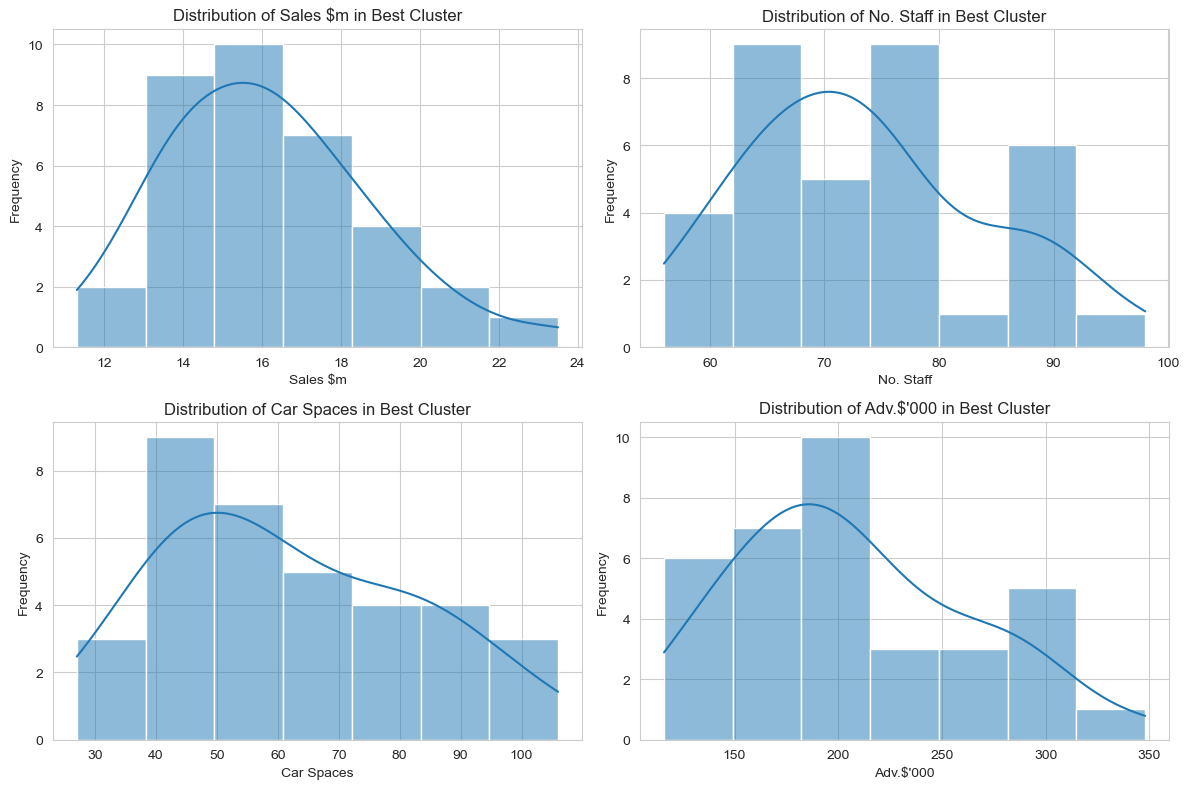

In [426]:
# Select features to visualize distributions for
features_to_dist_plot = ['Sales $m', 'No. Staff', 'Car Spaces', 'Adv.$\'000'] 

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_dist_plot):
    plt.subplot(2, 2, i + 1) # Adjust layout (2x2 grid)
    sns.histplot(best_cluster[feature], kde=True) # Histogram with KDE overlay
    plt.title(f'Distribution of {feature} in Best Cluster')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()